In [221]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np 
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

A good [resource](https://towardsdatascience.com/how-to-crush-your-data-take-home-interview-a0b9f7c97d6). 

When you're done, create a brief presentation: 
- Introduce problem
- Overview of process 
- Highlight key results 
- Recommendations / Conclusions / Future Work 

# Data Analysis Skeleton (TITLE)

This project is broken into 6 steps: 
1. [Problem Definition](#problem_definition)
2. [Gathering Data / Information](#get_data)
3. [Data Cleaning / Imputation](#clean)
4. [Exploratory Analysis](#explore)
5. [Model Fitting](#fit)
6. [Interpret Results](#interpret)

# 1. Problem definition <a id='problem_definition'></a>

Determine if a reasonable pricing model can be created. 

Dependent variable: 
- Price  

Independent variables: 
- Avg. Area Income 
- Avg. Area House Age 
- Avg. Area Number of Rooms 
- Avg. Area Number of Bedrooms 
- Area Population 
- Price 
- Street 
- City 
- State 
- Zip 

# 2. Gathering Data / Information <a id='get_data'></a>

In [222]:
df = pd.read_csv('USA_Housing.csv', sep=",")


In [223]:
df[['Street','CityStateZip']] = df['Address'].str.split('\n',expand=True)
df[['City','StateZip']] = df['CityStateZip'].str.split(',',expand=True)
df[['drop','State','Zip']] = df['StateZip'].str.split(' ',expand=True)
df.drop(columns=['drop','Address', 'CityStateZip', 'StateZip'], inplace=True)

In [224]:
df.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Street,City,State,Zip
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,208 Michael Ferry Apt. 674,Laurabury,NE,37010-5101
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,188 Johnson Views Suite 079,Lake Kathleen,CA,48958


In [225]:
print(f"Housing table has {df.shape[0]} rows and {df.shape[1]} columns.")

Housing table has 5000 rows and 10 columns.


# 3. Data Cleaning / Imputation <a id='clean'></a>


The following cleaning operations will be done: 
- Create meaningful column names 
- Check for nulls and ensure columns have proper data type (`df.info`)
- Do a quick investigation of the distribution of data (`df.describe`)
- For any categorical variables, investigate the counts
- Examine the distribution of the numeric variables 

_______________
**Create meaningful column names**: 

Let's change some of the column names to remove the spaces, and make them shorter for readability: 

In [226]:
df.rename(columns={"Avg. Area Income"            : "area_income",
                   "Avg. Area House Age"         : "house_age", 
                   "Avg. Area Number of Rooms"   : "num_rooms",
                   "Avg. Area Number of Bedrooms": "num_bed",
                   "Area Population"             : "population"
                  }, inplace=True)
df.head(1)

,area_income,house_age,num_rooms,num_bed,population,Price,Street,City,State,Zip
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,208 Michael Ferry Apt. 674,Laurabury,NE,37010-5101


**Check for nulls and ensure each column has an appropriate data type:**

`df.info` gives quick information as to datatypes and null values: 

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area_income  5000 non-null   float64
 1   house_age    5000 non-null   float64
 2   num_rooms    5000 non-null   float64
 3   num_bed      5000 non-null   float64
 4   population   5000 non-null   float64
 5   Price        5000 non-null   float64
 6   Street       5000 non-null   object 
 7   City         5000 non-null   object 
 8   State        4486 non-null   object 
 9   Zip          4486 non-null   object 
dtypes: float64(6), object(4)
memory usage: 390.8+ KB


The `State` and `Zip` columns both contain 514 null values.  
The datatypes for `City`, `State`, and `Zip` should be changed to string. 

_____
**Change datatype where necessary:**

In [228]:
df.astype({'Street': 'string',
           'City'  : 'string',
           'State' : 'string',
           'Zip'   : 'string',}).dtypes

area_income    float64
house_age      float64
num_rooms      float64
num_bed        float64
population     float64
Price          float64
Street          string
City            string
State           string
Zip             string
dtype: object

_____________
Use df.describe to get summary statistics.

This helps get an understanding of the distribution of the data. 

In [229]:
df.describe()

,area_income,house_age,num_rooms,num_bed,population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


_____
**Check for any duplicate rows:**

In [230]:
duplicateRows = df[df.duplicated()]
duplicateRows

,area_income,house_age,num_rooms,num_bed,population,Price,Street,City,State,Zip


Looks like there are no duplicates!

_______
**NOTE**:  
There were many rows where state and zip were missing.   
It might be interesting to drop these later on and see how that affects results. 

# 4. Exploratory Analysis <a id='explore'></a>

______
**Investigate counts of categorical variables**

**State:**

<AxesSubplot: xlabel='State', ylabel='count'>

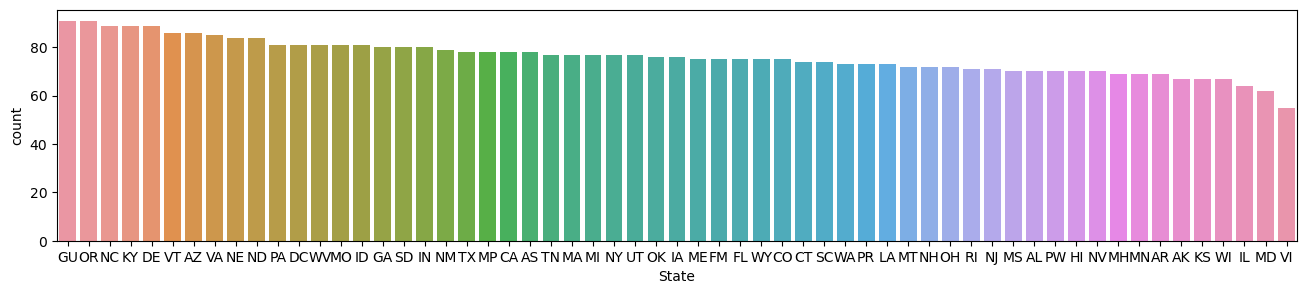

In [231]:
fig, ax = plt.subplots(figsize=(16,3))  
sns.countplot(x='State', 
              data=df,
              order = df['State'].value_counts().index)

In [232]:
print(f"There are {len(df['State'].unique())} unique state values... humm...")

There are 60 unique state values... humm...


_____
**Graphically investigate the distribution of the numeric columns:**

Also, check for any extreme outliers. 


First, plot a box plot.   
The line inside the box represents the median (midpoint) of the data.  
The boxes above and below the line represent 25% of the data above the mean, and 25% of the data below the mean. 

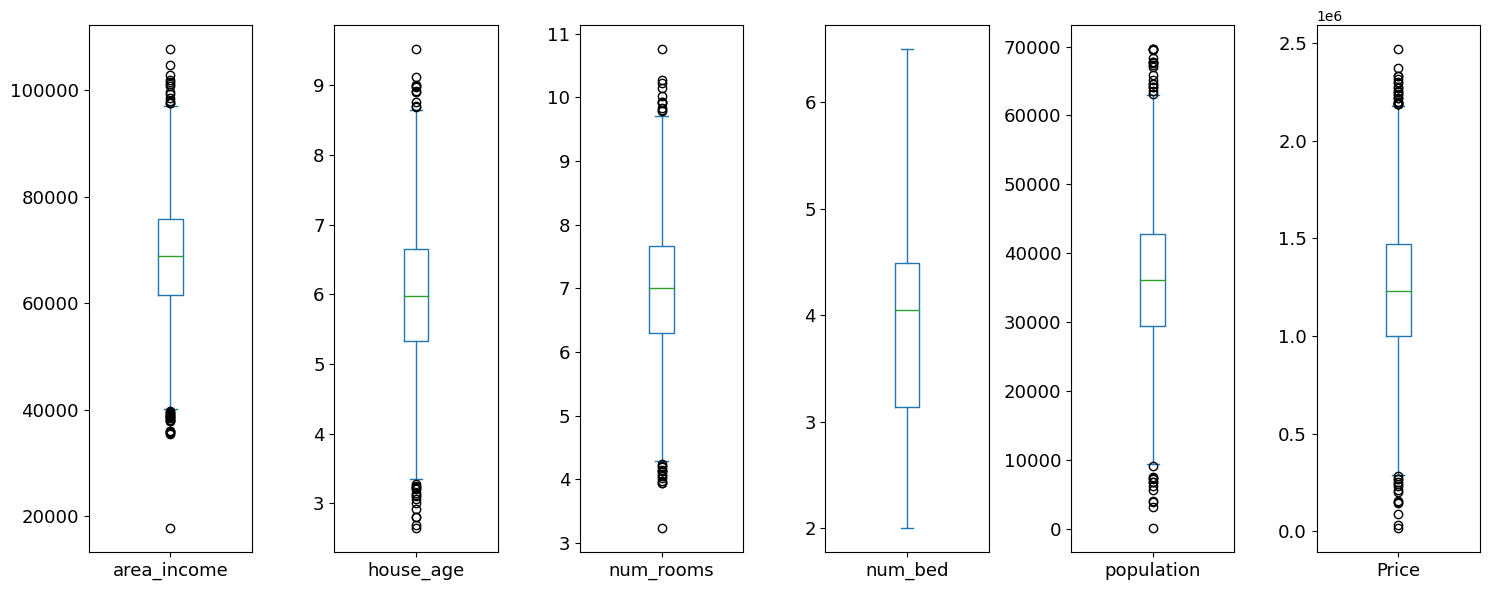

In [233]:
df.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(15, 6), 
    fontsize=13
)
plt.tight_layout()
plt.show()

Investigate distribution, this time with a histogram rather than a box plot: 

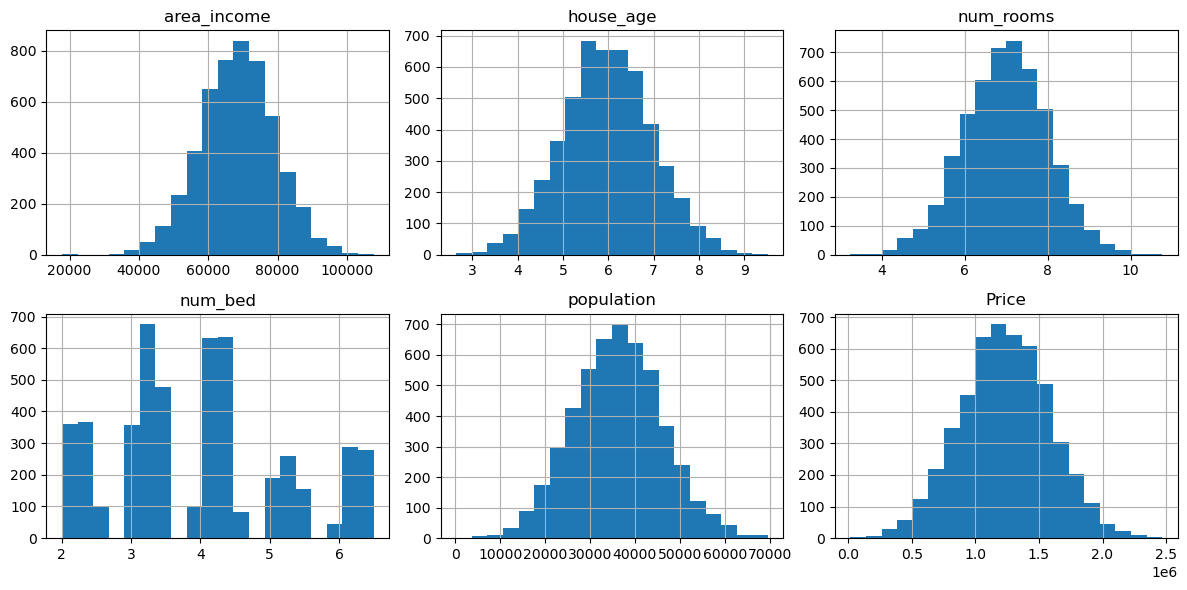

In [234]:
fig, axis = plt.subplots(2,3,figsize=(12,6))
df.hist(ax=axis, bins=20)
fig.tight_layout()
plt.show()

Most of the data (aside from num_bed), looks about Gaussian normal. 

The state values are reasonably well distributed: 
- GU has 91 entries (max)
- VI has 55 (min) 
- The mean entries per state is 76. 

____
**Plot price vs various independent variables:**

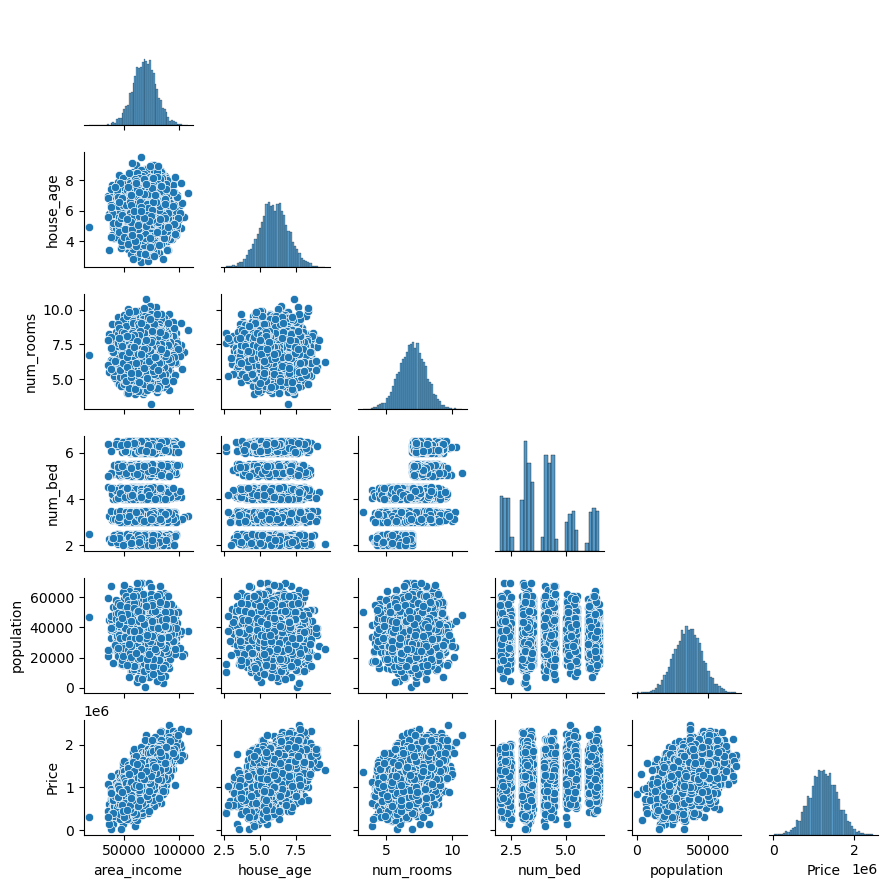

In [235]:
# sns.pairplot(df, hue="State")
sns.pairplot(df, corner=True, height=1.5)
plt.show()

From the above plot, there aren't any overly-striking linear relationships between any of independent variables. 

Price appears positively correlated with: 
- area_income
- house_age 
- num_rooms
- population 

_____
**Correlation matrix:**

<AxesSubplot: >

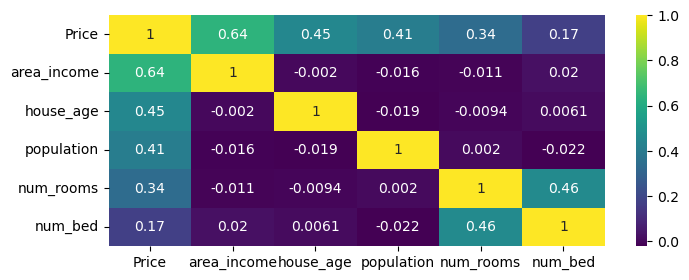

In [239]:
# Correlation matrix
plt.figure(figsize=(8,3))
# Order the cols from highest to lowest corr to quality 
cols = df.corr(numeric_only=True).nlargest(df.shape[1], 'Price')['Price'].index
cm = df[cols].corr(numeric_only=True)
sns.heatmap(cm, annot=True, cmap = 'viridis')

# 5. Model Fitting <a id='fit'></a>

**For this dataset, let's attempt two models:**
- Multivariate linear regression 
- Random Forest 

____
**Split the data into test and training sets:** 

In [240]:
labels = np.array(df['Price'])
subset = df[['area_income', 'house_age', 'population', 'num_rooms']]
x_train, x_test, y_train, y_test = train_test_split(subset, labels, test_size = 0.25)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3750, 4), (1250, 4), (3750,), (1250,))

In [241]:
#add constant to predictor variables
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

#fit linear regression model
SM_model_fit = sm.OLS(y_train, x_train).fit()

#view model summary
print(SM_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 1.060e+04
Date:                Mon, 20 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:18:09   Log-Likelihood:                -48503.
No. Observations:                3750   AIC:                         9.702e+04
Df Residuals:                    3745   BIC:                         9.705e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.639e+06   1.98e+04   -133.622      

Amazing! Let's investigate the results a bit: 
- R^2 is 0.92, indicating that 92% of the variance in the dependent variable is explained by the independent variables in the model 
- P>|t| for each of the independent variables is 0, indicating that each of these variables is improving the accuracy of the model, and should be included 

____
**Predict housing values on the test set:**

In [242]:
predicted = SM_model_fit.predict(x_test)

In [243]:
x_test['predicted'] = predicted
x_test['Price'] = y_test

In [244]:
diff = x_test['Price'] - x_test['predicted']
print(f"{round(diff.abs().mean(),2)} --> nearly the same result as before")

84060.35 --> nearly the same result as before


In [245]:
print(f"{round(diff.abs().mean()/x_test['Price'].mean()*100, 2)}% error on the test set predictions")

6.82% error on the test set predictions


# 6. Interpret Results <a id='interpret'></a>

___
**Visualizing actual house prices vs predicted prices:**

In [246]:
# demand array must be 2D, reshape() makes this nympy array 2D
# reshape is a numpy operator, so use .values to turn the pd series into a np array 
actual_price = x_test['Price'].values.reshape(-1,1)
predicted_price = x_test['predicted'].values.reshape(-1,1)
model = LinearRegression().fit(actual_price, predicted_price)
r_sq = model.score(actual_price, predicted_price)
print (f"R^2 value is {r_sq.round(3)}")

R^2 value is 0.915


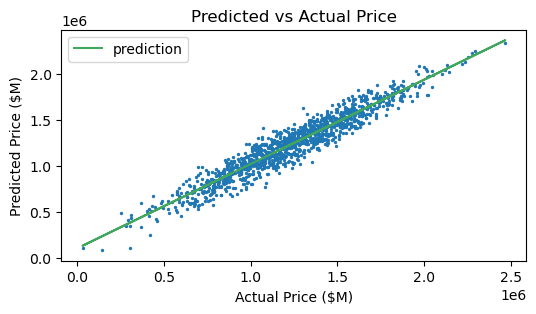

In [247]:
plt.figure(figsize=(6,3))
plt.title('Predicted vs Actual Price')
plt.xlabel("Actual Price ($M)")
plt.ylabel("Predicted Price ($M)")
plt.scatter(actual_price, predicted_price, s=2)
plt.plot(actual_price, model.coef_ * actual_price + model.intercept_, label='prediction', color="#42a65e")
plt.legend()
plt.show()

_____
**Visualizing residuals:**

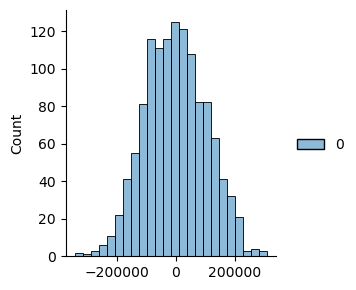

In [248]:
sns.displot(actual_price - predicted_price, height=3)


- Residuals seem to have a mean value of zero, indicating there is not strong bias in the model. 
- Residuals seem to be normally distributed 

In [249]:
x_test['error'] = x_test['Price'] - x_test['predicted']

In [252]:
residual_investigation = x_test.drop(columns=['predicted','Price','const'])

<AxesSubplot: >

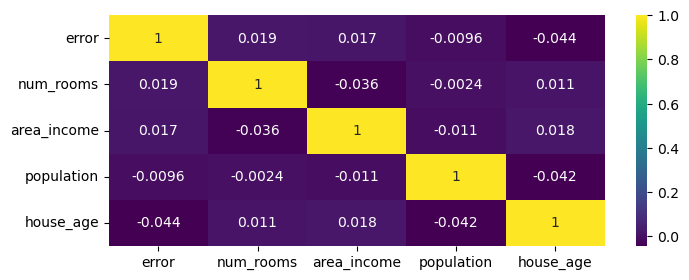

In [254]:
# Correlation matrix
plt.figure(figsize=(8,3))
# Order the cols from highest to lowest corr to quality 
cols = residual_investigation.corr(numeric_only=True).nlargest(residual_investigation.shape[1], 'error')['error'].index
cm = residual_investigation[cols].corr(numeric_only=True)
sns.heatmap(cm, annot=True, cmap = 'viridis')


From the above plot, it appears there are no correlations between the residuals and the independent variables.